# Household-Electric-Power-Consumption


The dataset <a href="https://archive.ics.uci.edu/ml/datasets/individual+household+electric+power+consumption">‘Household Power Consumption‘</a> is a multivariate time series dataset that describes the electricity consumption for a single household over four years.  The data was collected between December 2006 and November 2010 and observations of power consumption within the household were collected every minute.

Attribute Information:

1.date: Date in format dd/mm/yyyy

2.time: time in format hh:mm:ss

3.globalactivepower: household global minute-averaged active power (in kilowatt)

4.globalreactivepower: household global minute-averaged reactive power (in kilowatt)

5.voltage: minute-averaged voltage (in volt)

6.global_intensity: household global minute-averaged current intensity (in ampere)

7.submetering1: energy sub-metering No. 1 (in watt-hour of active energy). It corresponds to the kitchen, containing mainly a dishwasher, an oven and a microwave (hot plates are not electric but gas powered).

8.submetering2: energy sub-metering No. 2 (in watt-hour of active energy). It corresponds to the laundry room, containing a washing-machine, a tumble-drier, a refrigerator and a light.

9.submetering3: energy sub-metering No. 3 (in watt-hour of active energy). It corresponds to an electric water-heater and an air-conditioner.


<h2>01: Load data</h2>

The dataset can be downloaded from the UCI Machine Learning repository as a single 20 megabyte .zip file: <a href="https://archive.ics.uci.edu/ml/machine-learning-databases/00235/household_power_consumption.zip">household_power_consumption.zip</a>
Download the dataset and unzip it into your current working directory. You will now have the file “household_power_consumption.txt” that is about 127 megabytes in size and contains all of the observations.

We can use the read_csv() function to load the data and combine the first two columns into a single date-time column that we can use as an index.

In [4]:
import pandas as pd
data=pd.read_csv("household_power_consumption_mod.csv",header=0,infer_datetime_format=True,parse_dates=['datetime'],index_col=['datetime'])
data.head()

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3,Sub_metering_4
datetime,,,,,,,,
2006-12-16 17:24:00,4.216,0.418,234.84,18.4,0.0,1.0,17.0,52.266670
2006-12-16 17:25:00,5.360,0.436,233.63,23.0,0.0,1.0,16.0,72.333336
2006-12-16 17:26:00,5.374,0.498,233.29,23.0,0.0,2.0,17.0,70.566666
2006-12-16 17:27:00,5.388,0.502,233.74,23.0,0.0,1.0,17.0,71.800000
2006-12-16 17:28:00,3.666,0.528,235.68,15.8,0.0,1.0,17.0,43.100000


 <h2>02: Observation of electricity consumption over time:</h2>
 
 The best way to understand a multivariate time series (data) is to draw
line graphs. We can start by creating a separate one for each of the seven
variables for four years from January 2007 to January 2011. The complete example is listed
below:

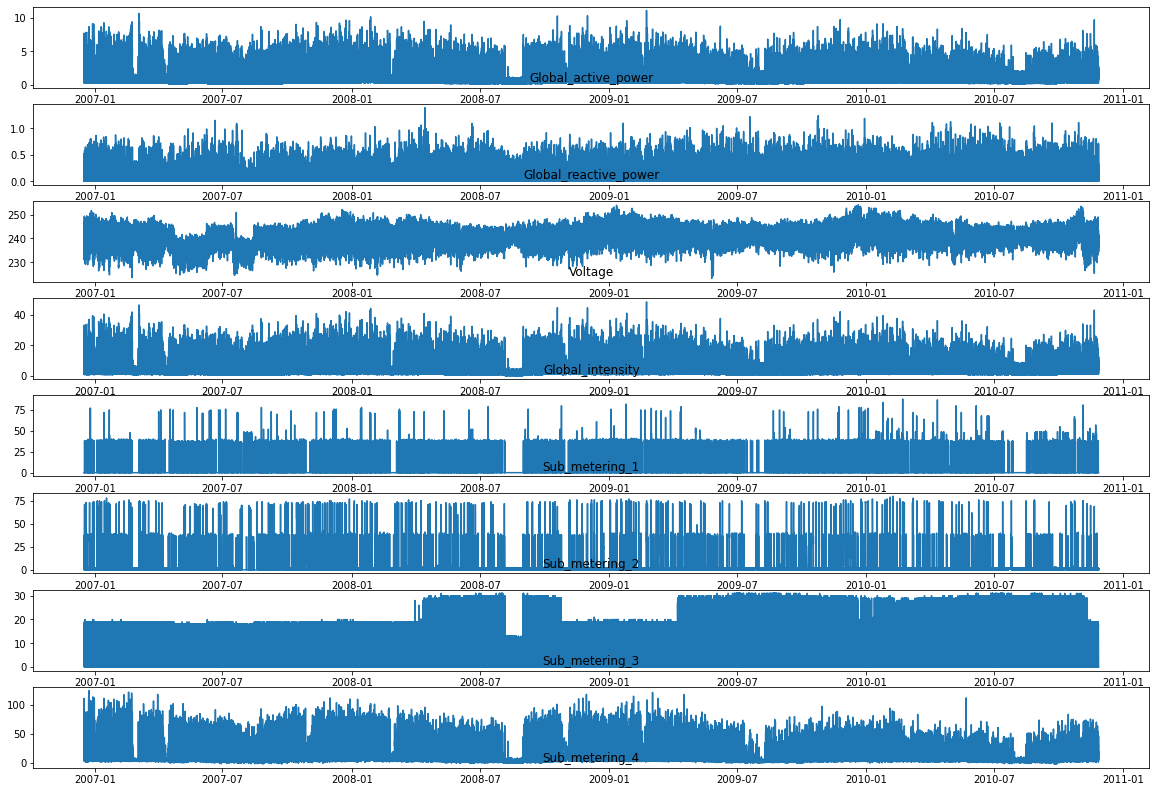

In [5]:
from matplotlib import pyplot
pyplot.figure(figsize=(20,14))
for i in range(len(data.columns)):
	pyplot.subplot(len(data.columns), 1, i+1)
	name = data.columns[i]
	pyplot.plot(data[name])
	pyplot.title(name, y=0)
pyplot.show()

These graphs showing the energy metrics of a particular location in a household
show different values, between evolution and degradation, of electricity consumption.
Let's analyze as a first case the results obtained by the sub metering 1 in the kitchen:
this place, which has various household appliances, has as its main function the preparation of food and
preparation of food and dishes. This invariable function is synonymous with saying that the
that we need and will need are always the same, which means that the electricity
that the values of electricity consumed remain in an analogous level.
Let's move on to another example, that of the measurements of the "sub metering 3" for
air conditioning systems that we can explain in 4 main phases:
[2007-07, 2008-07]: From the summer of 2007 to the summer of 2008, the electricity consumption is too low because it is not yet
low since no air conditioning system has been installed yet.
[2008-07, 2009-01]: The consumption has evolved at this stage since they have installed a new system.
new system.
[2009-01, 2010-01]: In winter, we fall again in the degradation of these
values again because of not moving in the air conditioning system (a boiler as an illustration).
illustration).
[2010-01, 2010-07]: New devices have been installed involving the increase of energy consumption in the
of energy consumption in the household.

<h2>03: Annual visualization for the variable total active power</h2>

In this section, we will discuss the variable "Total Active Power". We will start with the annual
visualization, we will draw a graph for each year, and then we will present some
observations that can be deduced from it, the figure below shows the graphs obtained.
shows the graphs obtained.

C:\Users\Imad\AppData\Local\Temp\ipykernel_14544\858462778.py:10: FutureWarning: Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.
  result = dataset[str(year)]


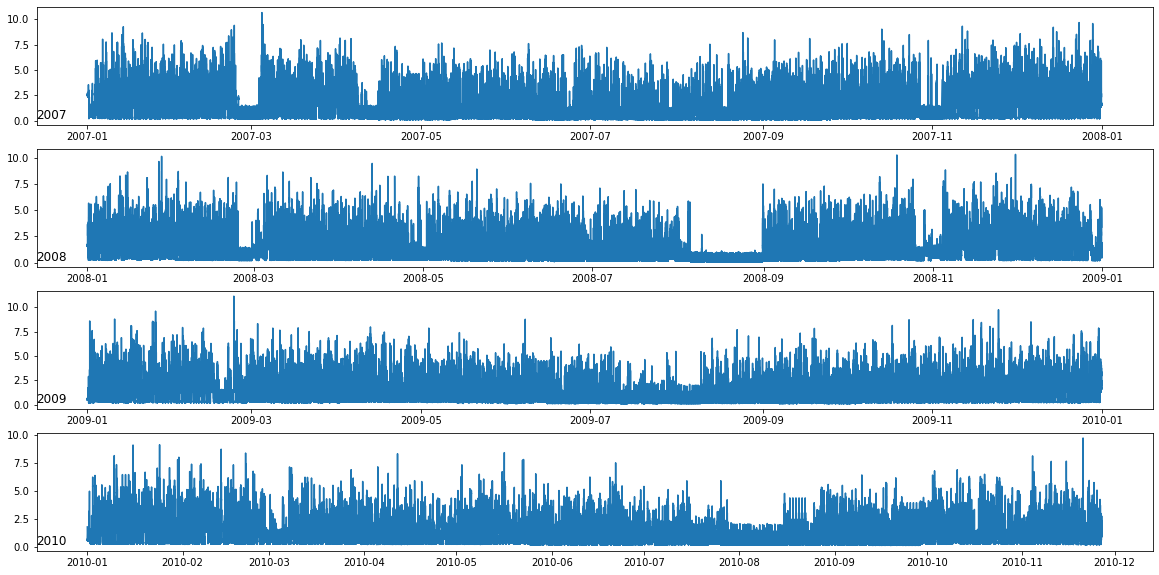

In [6]:
dataset = data
years = ['2007', '2008', '2009', '2010']
pyplot.figure(figsize=(20,10))
for i in range(len(years)):
	# prepare subplot
	ax = pyplot.subplot(len(years), 1, i+1)
	# determine the year to plot
	year = years[i]
	# get all observations for the year
	result = dataset[str(year)]
	# plot the active power for the year
	pyplot.plot(result['Global_active_power'])
	# add a title to the subplot
	pyplot.title(str(year), y=0, loc='left')
    
pyplot.show()

We can start by looking at the similarities over the four-year period, and the graphs
are quite similar. For example, we noticed that the consumption during the winter months
winter months was very high compared to the other months, furthermore, we noticed that consumption
that the consumption decreased during the summer months (August) of 2008, 2009 and 2010, which is
which is logical because most people go on vacation during these months, and unlike in 2007
year 2007, the consumption in August is normal, which means that they are still at home.
home. We can notice a decrease in consumption at the end of February and beginning of March in
2007 and 2008, which may be related to the other matched individuals who were not followed up, as can be seen in Fig.
can be seen in Figure

<h3>03: Monthly visualization for the variable total active power</h3>

In this part, we will draw graphs of the monthly consumption of the year
2008 the figure below shows the graphs obtained:

C:\Users\Imad\AppData\Local\Temp\ipykernel_14544\868321261.py:9: FutureWarning: Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.
  result = dataset[month]


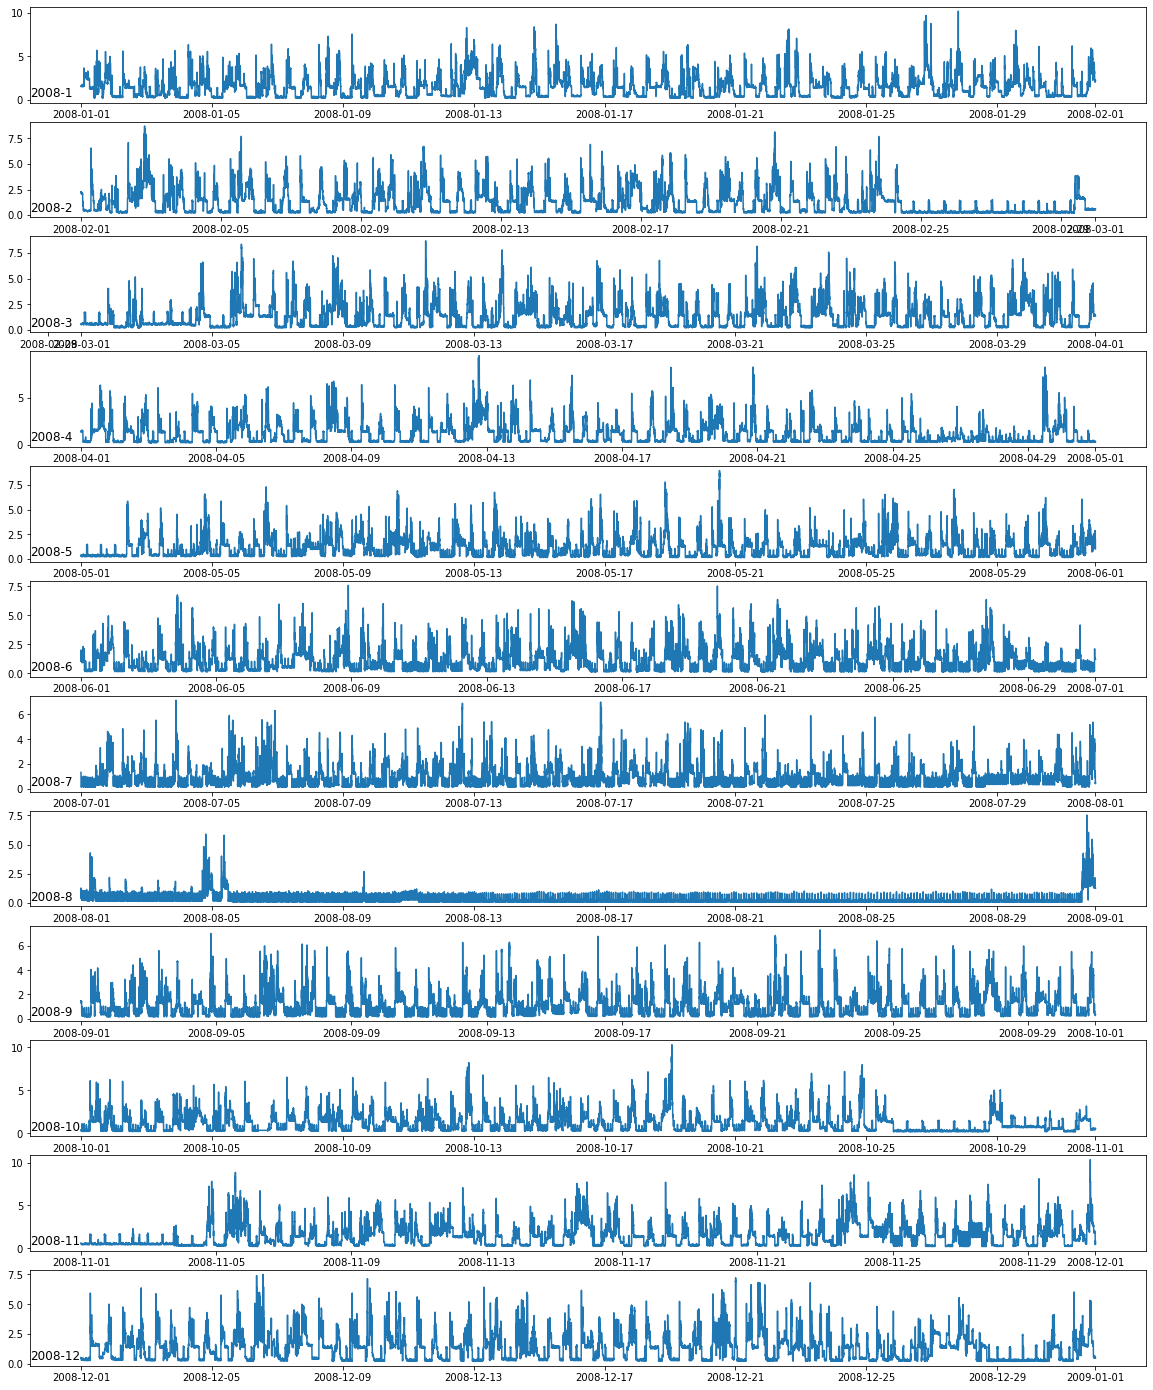

In [8]:
months = [x for x in range(1, 13)]
pyplot.figure(figsize=(20,25))
for i in range(len(months)):
	# prepare subplot
	ax = pyplot.subplot(len(months), 1, i+1)
	# determine the month to plot
	month = '2008-' + str(months[i])
	# get all observations for the month
	result = dataset[month]
	# plot the active power for the month
	pyplot.plot(result['Global_active_power'])
	# add a title to the subplot
	pyplot.title(month, y=0, loc='left')
pyplot.show()

We can notice a decrease in consumption in August, which confirms our opinion that
that it was the vacation period, and we notice a direct increase in consumption at the end of
at the end of the month.

<h2> 04: Daily visualization for the variable total active power</h2>

Let's now focus on the daily analysis. In this part, we will plot graphs of daily electricity consumption, starting in January for 16 days in 2008, as shown days in 2008, as shown in the figure below:

C:\Users\Imad\AppData\Local\Temp\ipykernel_14544\345550237.py:9: FutureWarning: Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.
  result = dataset[day]


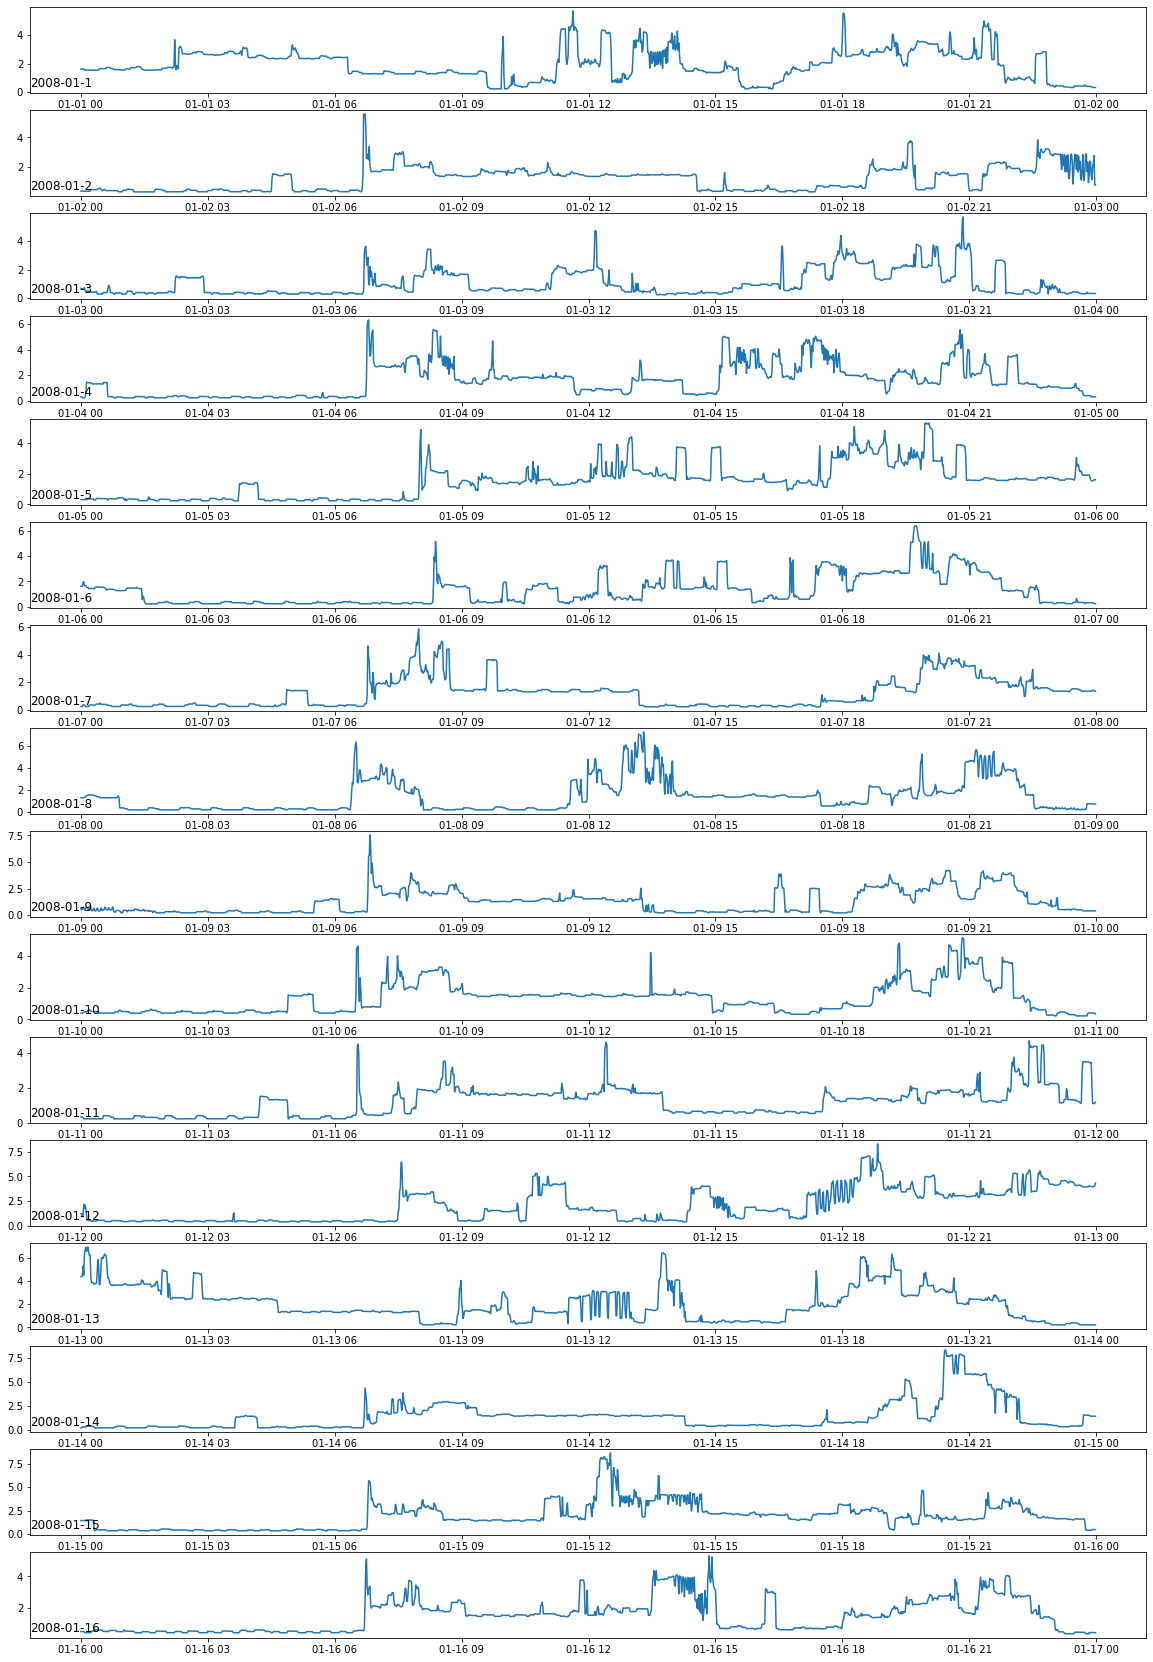

In [10]:
days = [x for x in range(1, 17)]
pyplot.figure(figsize=(20,30))
for i in range(len(days)):
	# prepare subplot
	ax = pyplot.subplot(len(days), 1, i+1)
	# determine the day to plot
	day = '2008-01-' + str(days[i])
	# get all observations for the day
	result = dataset[day]
	# plot the active power for the day
	pyplot.plot(result['Global_active_power'])
	# add a title to the subplot
	pyplot.title(day, y=0, loc='left')
pyplot.show()

According to the observation of these graphs we can divide the behavior of the tenants
to 4 main phases:
The first phase [22h - 06h]: We notice the decrease of the electricity consumption
during this period which leads us to deduce that the inhabitants are asleep.
The second phase [06h - 10h]: We notice the increase of the consumption of electricity
of electricity, it means the beginning of the household activities.
The third phase [10am - 6pm]: We notice the decrease of electricity consumption,
which is logical, some household activities that use electricity are finished, and
some people leave the house.
The fourth phase [18h - 22h]: We notice again the increase of electricity consumption due to the return of
of electricity due to the return of the inhabitants to their homes, and since it is night, there is
the illumination of the bulbs, the television etc.
but apart from that there are exceptions like the weekend days (Sunday 13-01-
2008) where the electricity consumption has increased all the time.